## Evaluation Project - 5

### Census Income Project

#### Problem Statement:


        This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: 
            ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over$50K a year.

  

#### Description of fnlwgt (final weight)

    The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    A single cell estimate of the population 16+ for each state.

    Controls for Hispanic Origin by age and sex.

    Controls by Race, age and sex.

    We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



    To download the dataset, use the link given below. 



### STEP 1 : DATA PREPARATION
    - Loading imports
    - loading Dataset
    - Checking dtypes of Data
    - Checking information about data, STD , duplicate data , null/ missing values.  

In [1]:
#IMPORTING IMPORTS

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV


In [2]:
# Loading Data

train = pd.read_csv('census.csv')

In [3]:
train

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#
train.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### OBSERVATIONS:
    - Captital Gain / loss have 75% quantile value (75% of Data is 0)around 0 , and only few vlaues are high, makes it unrelaisitic effection our model.
    - WE will visualize more in later step to decide how to treat these features.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


CHECKING FOR MISSING VLAUES

In [6]:
(train.isnull()).sum(axis=0)

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
for i in train.columns:
    print(train[i].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int6

#### OBSERVATIONS:
    - 9 Categorical Features.
    - 5 Numerical Features.
    - Income is Target Variable (CAtegorical)
    
    
    - Work Class has missing Values with '?'
    -  Occupation has missing Values with '?'
    -  Native_country has missing Values with '?'

In [8]:
train['Workclass'] = train['Workclass'].apply(lambda x : np.NaN if (x.find('?')>0) else x)
train['Occupation'] = train['Occupation'].apply(lambda x : np.NaN if (x.find('?')>0) else x)
train['Native_country'] = train['Native_country'].apply(lambda x : np.NaN if (x.find('?')>0) else x)

In [9]:
(train.isnull()).sum(axis=0)

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<AxesSubplot:>

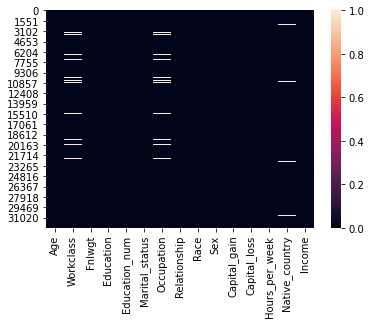

In [10]:
sb.heatmap(train.isnull())

#### AS ALL THE MISSING VALUES ARE Categorical Values, we Use MODE TO FILL THE MISSING VALUES.

In [11]:
train['Workclass'] = train['Workclass'].fillna(train['Workclass'].mode()[0])
train['Occupation'] = train['Occupation'].fillna(train['Occupation'].mode()[0])  
train['Native_country'] = train['Native_country'].fillna(train['Native_country'].mode()[0])  

# EDA: 
    - Understanding Relationships between variables.
    - Univariante, Bivariante, Multivariante Analysis.

### CHECKNIG THE TARGET CLASS COUNTPLOT

In [12]:
from plotnine import *

<AxesSubplot:xlabel='Income', ylabel='count'>

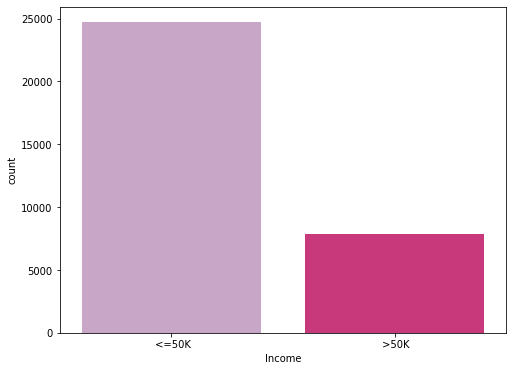

In [13]:
plt.figure(figsize=(8,6))
sb.countplot(train['Income'],palette='PuRd')

#### OBSERVATION: TARGET CLASS IMBALANCED
        --->  Applying Undersampling for EDA PUrposes,
        ---> OverSampling/Undersampling for Modelling.

In [15]:
from imblearn.under_sampling import RandomUnderSampler

In [16]:
y = train['Income']
x = train.drop('Income',axis=1)
rus = RandomUnderSampler(random_state=0)
rus.fit(x,y)


RandomUnderSampler(random_state=0)

In [17]:
x_resampled, y_resampled = rus.fit_resample(x,y)

<AxesSubplot:xlabel='Income', ylabel='count'>

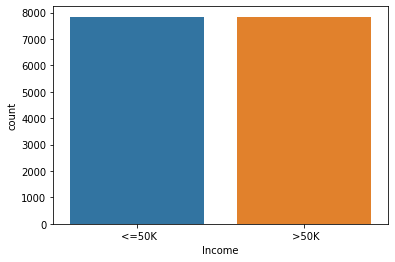

In [18]:
sb.countplot(y_resampled)

#### NOTE:
    WE USE BALANCED CLASSES FOR VISUALIZATION TO GET MORE INFORMATION ON MINORITY CLASS, as it difficult to get information when the classes are imblanced

In [19]:
x_resampled['Income'] = y_resampled

In [20]:
x_resampled['Income'].value_counts()

 >50K     7841
 <=50K    7841
Name: Income, dtype: int64

### VIZUALIZING BOTH WITH IMBALANCED / bALANCED CLASS FOR BETTER INFORMATION

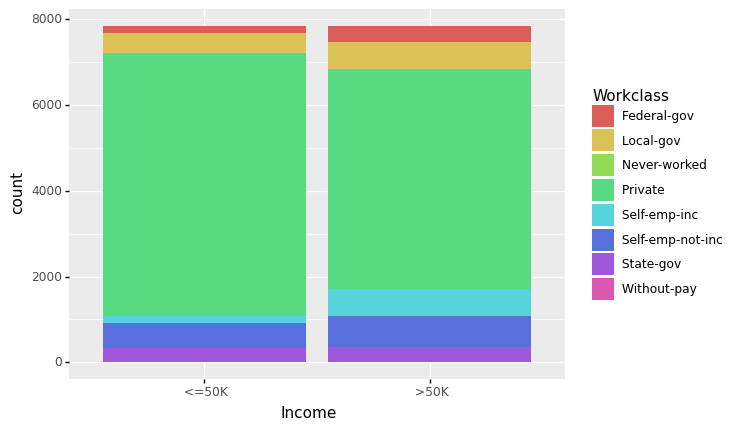

<ggplot: (136645056314)>

In [21]:
ggplot(x_resampled, aes(x='Income', fill = 'Workclass')) + \
    geom_bar(stat = 'count')



####  observations:
    - IT SEEMS >50K has higher count of Self-emp-not-inc, self-imploy-inc, local-gov, Federal-gov than <=50K
    - Private has greter count for <=50K
    
    - As with-out pay, Never=worked is hard to visualize, we get the data and visualize

In [22]:
train[(train['Workclass']==' Without-pay' )|(train['Workclass']==' Never-worked' ) ]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
1900,65,Without-pay,27012,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K
5360,18,Never-worked,206359,10th,6,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
9256,19,Without-pay,344858,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
10844,23,Never-worked,188535,7th-8th,4,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
14771,17,Never-worked,237272,10th,6,Never-married,Prof-specialty,Own-child,White,Male,0,0,30,United-States,<=50K
15532,21,Without-pay,232719,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
15694,22,Without-pay,302347,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,4416,0,40,United-States,<=50K
16811,46,Without-pay,142210,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,25,United-States,<=50K
20072,65,Without-pay,172949,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,2414,0,20,United-States,<=50K
20336,18,Never-worked,157131,11th,7,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K


### AS you can see Never-worked, without pay always has <=50K, we can assume this category has high probabiltiy to belong to <=50K , WE can merge this categories together.

In [23]:
train['Workclass'] = train['Workclass'].apply(lambda x:'NotWorked/WithoutPay' if((x==' Never-worked') |(x==' Without-pay' ))
                                                 else x
                                             )

#### COUNTPLOT OF EDUCATION WRT to INCOME

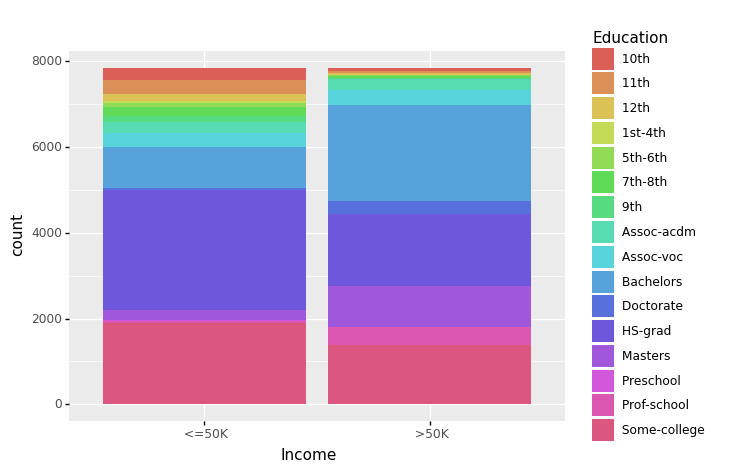

<ggplot: (136644869024)>

In [24]:
ggplot(x_resampled, aes(x='Income', fill = 'Education')) + \
    geom_bar(stat = 'count')



#### OBSERVATIONS:
    - income with >50K has Greater count of Bachlors/ doctorate, Being a Bachelors probability to belong is >50K is higher.
    - For HS-Grad, probabability to belong in <=50K is higher.
    
    - As kids in scholl are definately more probability to belong in <=50K , we can group it and reduced the no of categories.

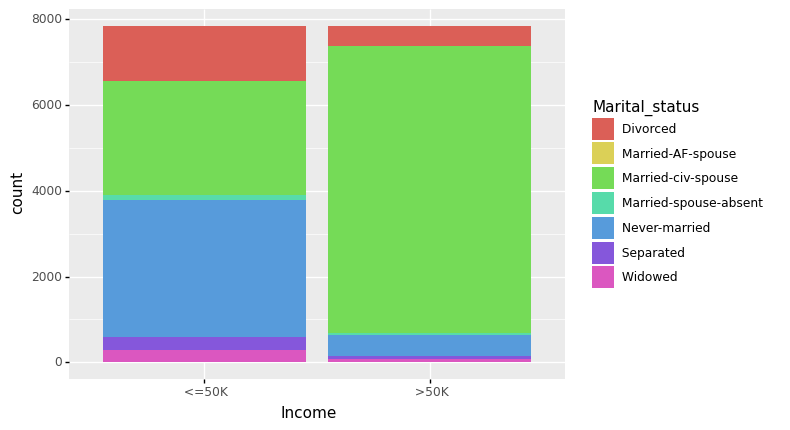

<ggplot: (136644927127)>

In [25]:
ggplot(x_resampled, aes(x='Income', fill = 'Marital_status')) + \
    geom_bar(stat = 'count')



##### OBSERVATIONS:
    -Higher probability of Married-civ-spouse to belong to >50K. 
    - Higher probability of Never-Married/Divorced/Widowed to belong to <=50K. 
    
       - AS Married AF Spouse/ Married -spous- Absent has a very low count , we can merge it with some category.WE can create a group for
    

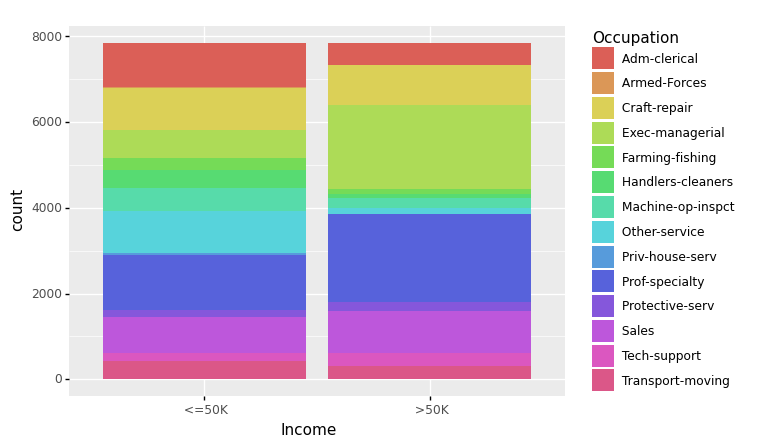

<ggplot: (136645051775)>

In [26]:
ggplot(x_resampled, aes(x='Income', fill = 'Occupation')) + \
    geom_bar(stat = 'count')



#### OBSERVATIONS:
    - HIgh probability for occupations Prof-Speicality, Sales, Exec-Manegerial to belong to >50K.
    - High Probability for Occupations other-services,,handles-cleaner,Adm-clerical to belong in <=50K

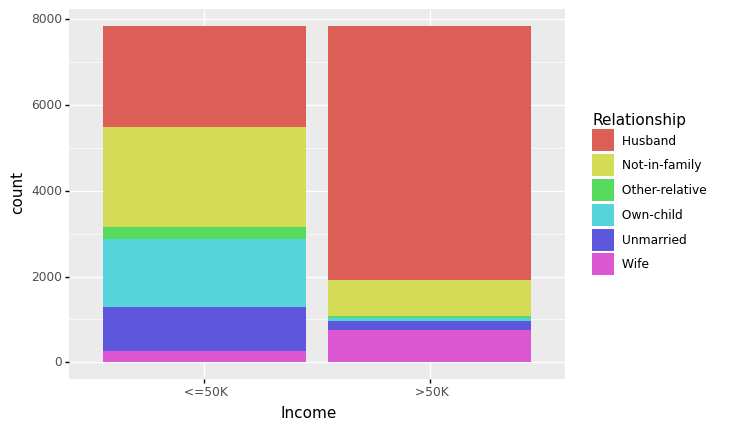

<ggplot: (136645104342)>

In [27]:
ggplot(x_resampled, aes(x='Income', fill = 'Relationship')) + \
    geom_bar(stat = 'count')



#### OBSERVATIONS:
    - Husbands/ Wife have higher probability to belong in >50K.
    - Own-Child,Unmarried,other relative. has Higher probability to belnog to <=50K.
    

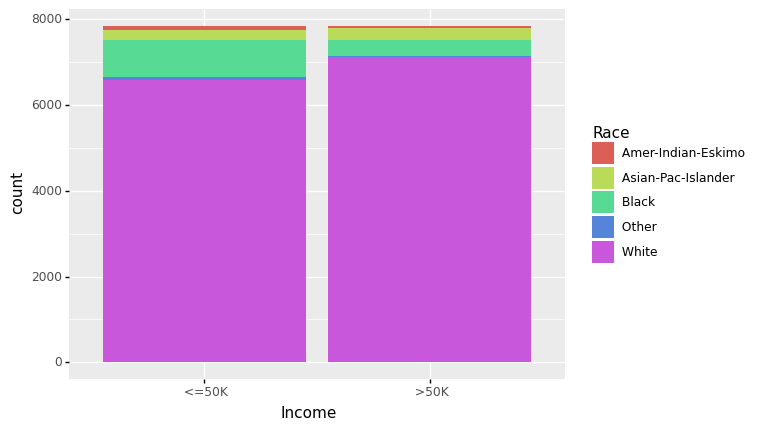

<ggplot: (136645142658)>

In [28]:
ggplot(x_resampled, aes(x='Income', fill = 'Race')) + \
    geom_bar(stat = 'count')



#### OBSERVATIONS:
    - Black RAce have high probability to belong in <=50K.
 

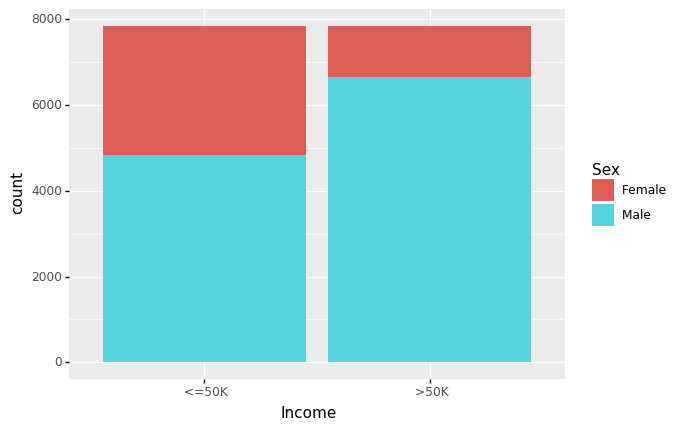

<ggplot: (136645193298)>

In [29]:
ggplot(x_resampled, aes(x='Income', fill = 'Sex')) + \
    geom_bar(stat = 'count')



#### OBSERVATIONS:
    - MAles have higher probability to belong in >50K. And Females have High count in <=50K

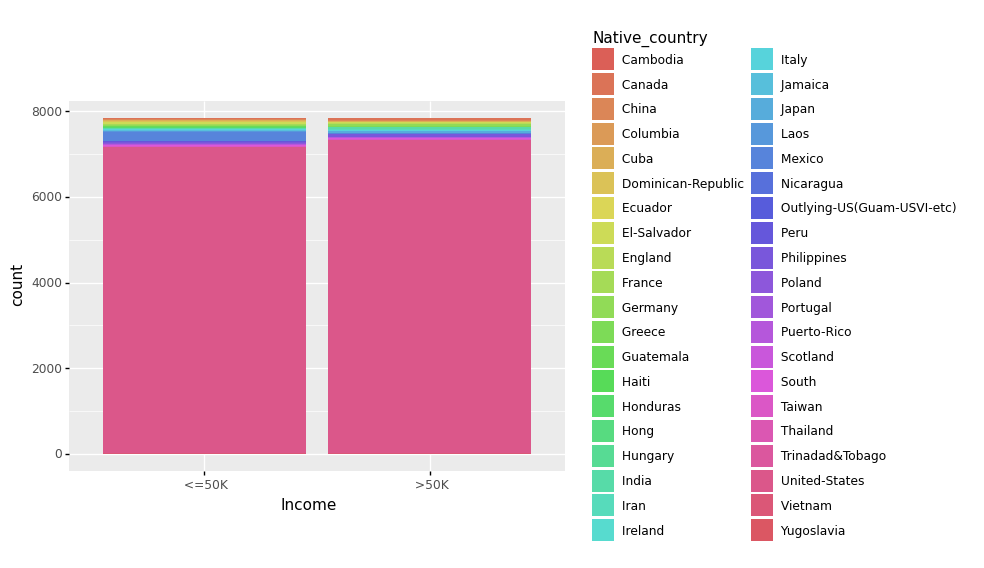

<ggplot: (136645443235)>

In [30]:
ggplot(x_resampled, aes(x='Income', fill = 'Native_country')) + \
    geom_bar(stat = 'count')



#### OBSERVATIONS:
    - more than 90% count belongs to USA, and other 10% to different countries, making it less of information and more noise.
    - AS USA in influencing more and other countries are influencing less to the target variable , we can group all other countries to a Seperate categroy as Others, and USA.

<AxesSubplot:xlabel='Education_num', ylabel='count'>

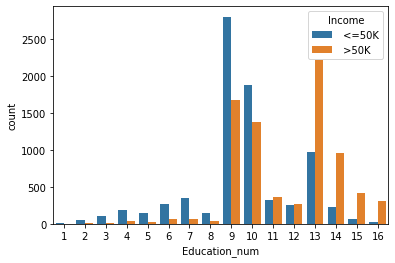

In [31]:
sb.countplot(x_resampled['Education_num'],hue=x_resampled['Income'])

#### OBSERVATIONS:
    - <=50K has higher probability of lower values of Education nums.
    - >50K has higher probability for number of Education nums.

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

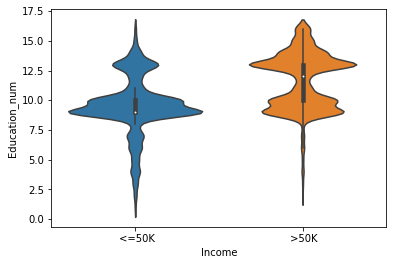

In [32]:
sb.violinplot(x_resampled['Income'],x_resampled['Education_num'])

#### VIsualizing continous Variable with Income

<AxesSubplot:xlabel='Age', ylabel='Density'>

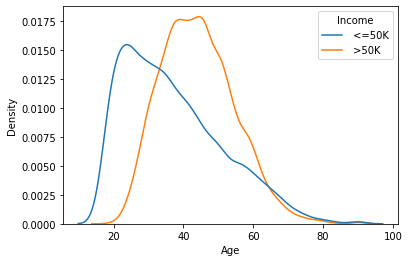

In [33]:
sb.kdeplot(x_resampled['Age'],hue=x_resampled['Income'])

<AxesSubplot:xlabel='Income', ylabel='Age'>

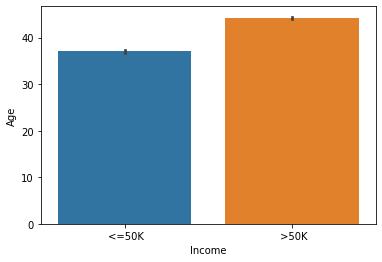

In [34]:
sb.barplot(x_resampled['Income'],x_resampled['Age'])

#### OBSERVATIONS:
    - MEan AGe of >50K is higher than  <=50K

In [35]:
train.groupby(by='Income').mean()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Income,,,,,,
<=50K,36.783648,190345.429467,9.594927,148.670537,53.145071,38.840163
>50K,44.249841,188005.000000,11.611657,4006.142456,195.001530,45.473026


<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

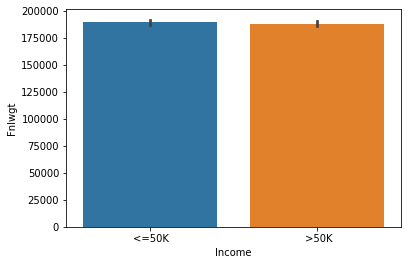

In [36]:
sb.barplot(x_resampled['Income'],x_resampled['Fnlwgt'])

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

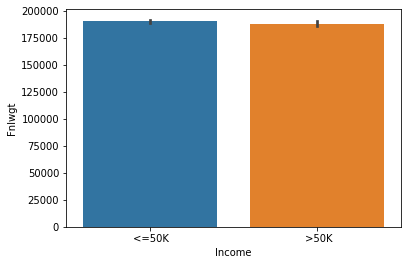

In [37]:
sb.barplot(train['Income'],train['Fnlwgt'])

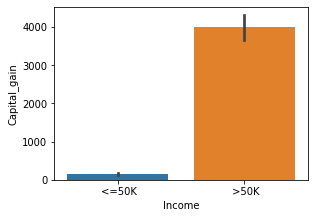

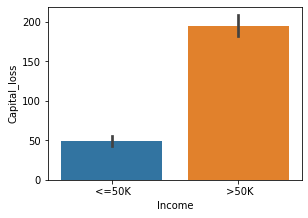

In [38]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sb.barplot(x_resampled['Income'],x_resampled['Capital_gain'])


plt.figure(figsize=(10,7))
plt.subplot(2,2,2)
sb.barplot(x_resampled['Income'],x_resampled['Capital_loss'])
plt.show()

#### Average Capital Loss/Gain less for <=50K

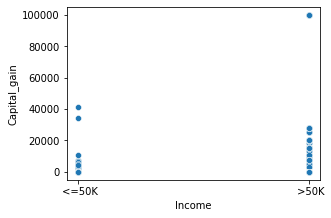

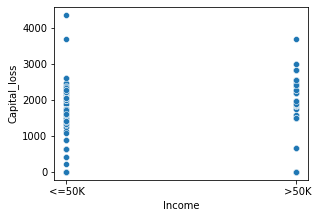

In [39]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sb.scatterplot(x_resampled['Income'],x_resampled['Capital_gain'])


plt.figure(figsize=(10,7))
plt.subplot(2,2,2)
sb.scatterplot(x_resampled['Income'],x_resampled['Capital_loss'])
plt.show()

#### OBSERVATIONS:
    -- IN Captital Loss, >50K has concentrated between 1500-3500.
    -- high Captital gain has high probability to belong to >50K

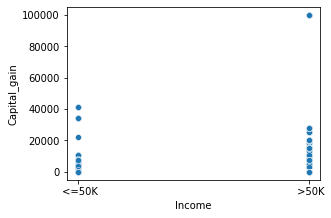

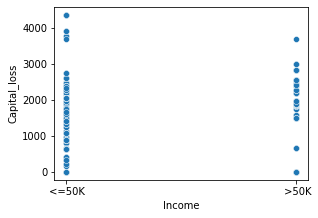

In [40]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sb.scatterplot(train['Income'],train['Capital_gain'])


plt.figure(figsize=(10,7))
plt.subplot(2,2,2)
sb.scatterplot(train['Income'],train['Capital_loss'])
plt.show()

#### CAPITAL LOSS HAS MORE INFLUENCE ON INCOME AS IT HAS MORE DIFINED BOUNDARIES THAN CAPITAL GAIN

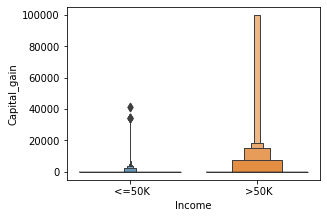

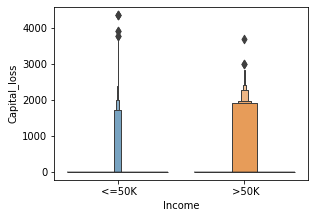

In [41]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sb.boxenplot(train['Income'],train['Capital_gain'])


plt.figure(figsize=(10,7))
plt.subplot(2,2,2)
sb.boxenplot(train['Income'],train['Capital_loss'])
plt.show()

#### OBSERVATIONS:
    -  Capital gain has high boundary, where as captital gain for <=50K is very low.
    - Captital Loss  has more defined boundary to compare between >50K and <-50K

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

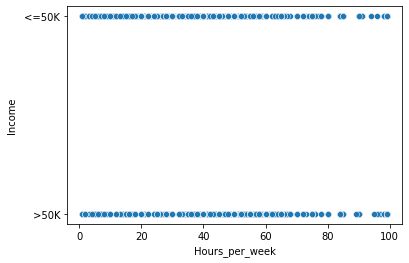

In [42]:
sb.scatterplot(x_resampled['Hours_per_week'],x_resampled['Income'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

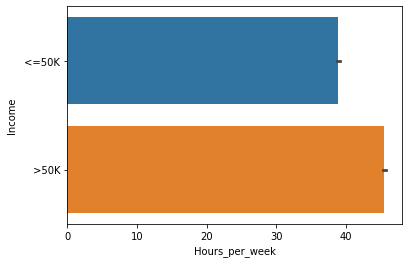

In [43]:
sb.barplot(x_resampled['Hours_per_week'],x_resampled['Income'])

##### Hours per week are higher for >50K
### LABEL ENCODING with LABELEncoder : categorical Variables


In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
train

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [46]:
### CHANGING NATIVE COUNNTRY OTHER THAN USA TO OTHERS

In [47]:
train['Native_country'] = train['Native_country'].apply(lambda x :'USA' if(x ==' United-States') else 'Others')

In [48]:
train.Native_country.value_counts()

USA       29752
Others     2808
Name: Native_country, dtype: int64

In [49]:
train

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,USA,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,USA,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,USA,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Others,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,USA,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,USA,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,USA,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,USA,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,USA,<=50K


In [50]:
cat_col =['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [51]:
for i in cat_col:
    train[i] = LabelEncoder().fit_transform(train[i] )

In [52]:
train

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,1,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,1,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,1,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,0,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,1,0
32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,1,1
32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,1,0
32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,1,0


In [53]:
train.Income.value_counts()
# 0 ==> <=50K
# 1 ==> >50K

0    24719
1     7841
Name: Income, dtype: int64

<AxesSubplot:>

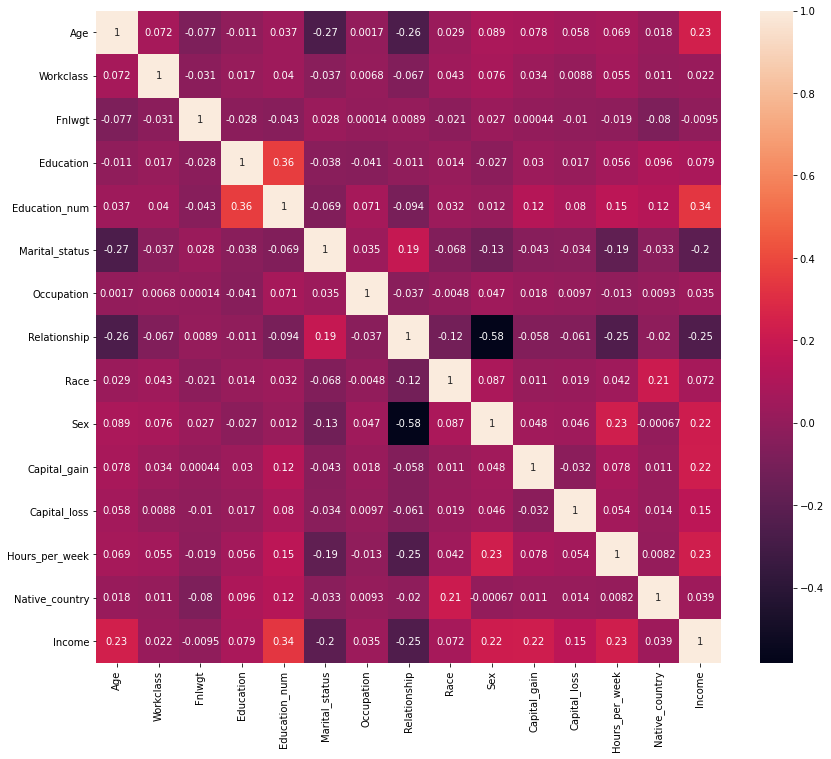

In [54]:
plt.figure(figsize=(14,12))
sb.heatmap(train.corr(),annot=True)

In [55]:
train.Native_country.value_counts()

1    29752
0     2808
Name: Native_country, dtype: int64

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### VIF ANALYSIS

In [186]:
x = train.drop('Income',axis=1)
y = train['Income']

In [188]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data[vif_data['VIF']>10]

,feature,VIF
4,Education_num,18.360491
8,Race,17.433161
12,Hours_per_week,11.643850
13,Native_country,11.816846


In [191]:
x1 = x.drop(['Education_num','Race'],axis=1)

In [192]:
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x1.values, i)
                          for i in range(len(x1.columns))]
vif_data[vif_data['VIF']>10]

,feature,VIF
10,Hours_per_week,10.53801


#### CHECKNIG DISTRIBUTION OF CONTINOUS VARIABLES


In [141]:
cont = ['Fnlwgt','Capital_gain','Capital_loss','Age','Hours_per_week']

### AS VALUES OF CAPTITAL GAIN AND LOSS ARE CONSIDERABLY HIGH, and outlier mgiht remove inportant information

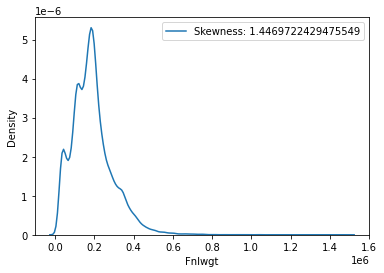

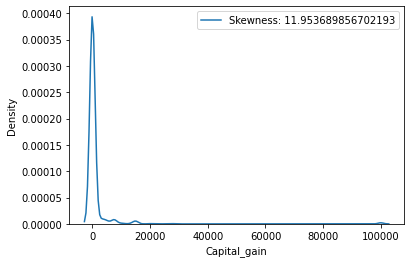

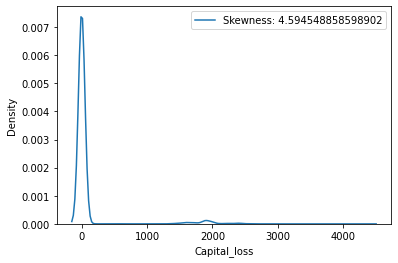

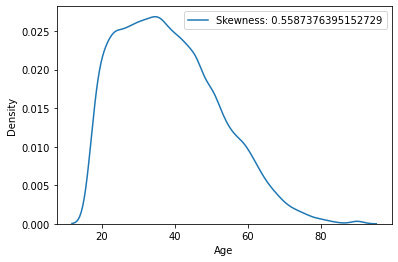

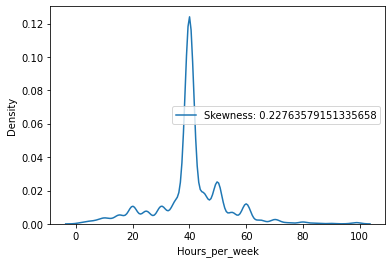

In [177]:
for i in cont:
    plt.figure()
    sb.kdeplot(train[i])
    plt.legend(['Skewness: '+str(train[i].skew())])

### CHECKNIG FOR OUTLIERS

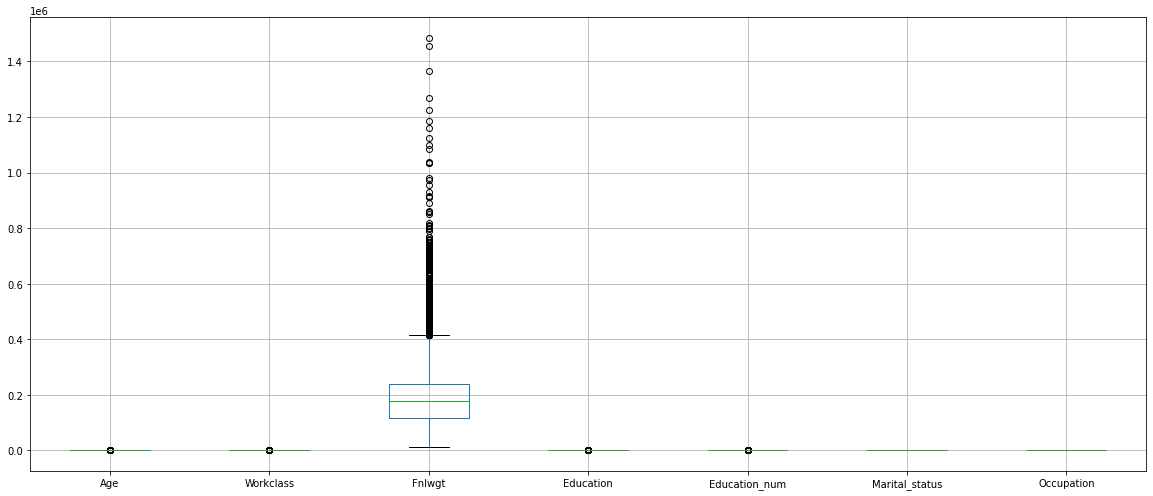

In [178]:
train.iloc[:,0:7].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=.25)
plt.show()

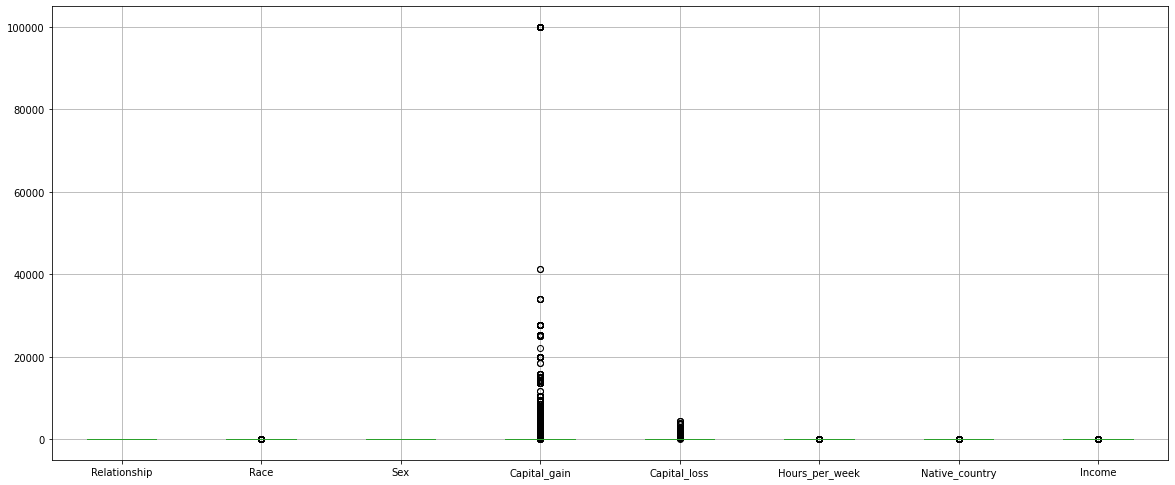

In [179]:
train.iloc[:,7:].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=.25)
plt.show()

#### Captial gain/loss/ fnlwgt / hours _per _Week has outliers

In [142]:
from scipy.stats import zscore

In [143]:
x1[cont].skew()

Fnlwgt             1.446972
Capital_gain      11.953690
Capital_loss       4.594549
Age                0.558738
Hours_per_week     0.227636
dtype: float64

In [144]:
from sklearn.preprocessing import PowerTransformer

In [145]:
x1[cont] = PowerTransformer().fit_transform(x1[cont])

In [146]:
x1[cont].skew()

Fnlwgt            0.016914
Capital_gain      3.016951
Capital_loss      4.299511
Age              -0.013897
Hours_per_week    0.229556
dtype: float64

In [147]:
scores = np.abs(zscore(x1))

In [148]:
len(np.where(scores>3)[0])

8902

In [149]:
x1

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.891947,4,-1.089889,9,2,3,0,1,-0.301370,-0.221213,-2.221515,1
1,0.102717,2,0.398743,11,0,5,1,1,-0.301370,-0.221213,-0.035570,1
2,1.064381,2,0.562540,1,2,5,0,1,-0.301370,-0.221213,-0.035570,1
3,-0.731663,2,1.340398,9,2,9,5,0,-0.301370,-0.221213,-0.035570,0
4,0.028023,2,0.957182,12,2,3,5,0,-0.301370,-0.221213,-0.035570,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.827983,2,0.746749,7,2,12,5,0,-0.301370,-0.221213,-0.197550,1
32556,0.247374,2,-0.193298,11,2,6,0,1,-0.301370,-0.221213,-0.035570,1
32557,1.334556,2,-0.219755,11,6,0,4,0,-0.301370,-0.221213,-0.035570,1
32558,-1.358341,2,0.271668,11,4,0,3,1,-0.301370,-0.221213,-1.654992,1


#### DATA MODELLING

In [150]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score

### SMOTE FOR OVERSAMPLER

In [151]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [152]:
x_over,y_over = SMOTE().fit_resample(x1,y)
x_under,y_under = RandomUnderSampler().fit_resample(x1,y)

In [153]:
    randomstate = 0
    max_score = 0
    lr = LogisticRegression()
    for i in range(1,50):
        x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=.30,random_state=i)
        lr.fit(x_train,y_train)
        pred = lr.predict(x_test)
        score = f1_score(y_test,pred)    
        if(score>max_score):
            max_score = score
            randomstate  = i
    print( 'Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score)

Random State= 3  and R2 Score of LR MODEL :  0.7494157361724229


In [154]:
    randomstate = 0
    max_score = 0
    lr = LogisticRegression()
    for i in range(1,50):
        x_train,x_test,y_train,y_test = train_test_split(x_under,y_under ,test_size=.30,random_state=i)
        lr.fit(x_train,y_train)
        pred = lr.predict(x_test)
        score = f1_score(y_test,pred)    
        if(score>max_score):
            max_score = score
            randomstate  = i
    print( 'Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score)

Random State= 17  and R2 Score of LR MODEL :  0.7498463429625075


#### AS UNDERSAMPLING/ OVer Sampling gives Same Results, we go with OverSampling , to not lose DAta.

### MODELING THE DATA : 
    - WE choose metrics for the model as f-1 score, and roc_auc score, recall ,precision as imbalanced classes , we need to check if the model is not biased towards the majority class.

In [155]:
    model = LGBMClassifier()
    randomstate = 0
    max_score = 0
    
    for i in range(1,200):
        x_train,x_test,y_train,y_test = train_test_split(x_over,y_over ,test_size=.30,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = f1_score(y_test,pred)    
        if(score>max_score):
            max_score = score
            randomstate  = i
    print('BEST Random State: ',randomstate,' With F1- Score : ',max_score)
    

BEST Random State:  68  With F1- Score :  0.9018635205791661


In [156]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over ,test_size=.27,random_state=132)

In [157]:
cv_scores = []
auc_roc_scores = []
acc_scores = []
f1_scores = []

In [158]:
def model_predict(model):
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,pred_proba)
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    print('ROC AUC Score           : ', roc_auc_score(y_test,pred_proba))
    print('F1 Score                :',f1_score(y_test,predictions))
    print('Cross Validation Score  : ',np.mean(cross_val_score(model,x_over,y_over,cv=5,scoring='f1')))
    
    
    print(classification_report(y_test,predictions))
    acc_scores.append(accuracy_score(y_test,predictions))
    cv_scores.append(np.mean(cross_val_score(model,x_over,y_over,cv=5,scoring='f1')))
    auc_roc_scores.append(roc_auc_score(y_test,pred_proba))
    f1_scores.append(f1_score(y_test,predictions))
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr,tpr)
    plt.ylabel('Sensitivity')
    plt.xlabel('1 - Specificity')
    leg = 'ROC CURVE SCORE:'+ str(roc_auc_score(y_test,pred_proba))
    plt.legend( [leg],loc= 10)
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    
    

### LOGISTIC REGRESSION

------------ LogisticRegression() --------------
 Accuracy Score         :  0.7313656453666941
ROC AUC Score           :  0.8046288396048086
F1 Score                : 0.7403706921517521
Cross Validation Score  :  0.7398359814847569
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      6654
           1       0.72      0.76      0.74      6695

    accuracy                           0.73     13349
   macro avg       0.73      0.73      0.73     13349
weighted avg       0.73      0.73      0.73     13349



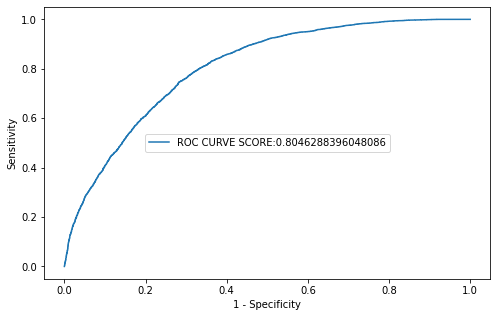

<Figure size 432x288 with 0 Axes>

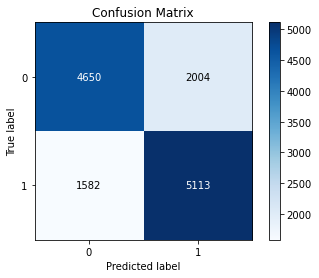

In [159]:
model_predict(LogisticRegression())

### KNN

------------ KNeighborsClassifier(n_neighbors=9) --------------
 Accuracy Score         :  0.846205708292756
ROC AUC Score           :  0.9144622729414416
F1 Score                : 0.8576381665626517
Cross Validation Score  :  0.8550624006228664
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      6654
           1       0.80      0.92      0.86      6695

    accuracy                           0.85     13349
   macro avg       0.85      0.85      0.85     13349
weighted avg       0.85      0.85      0.85     13349



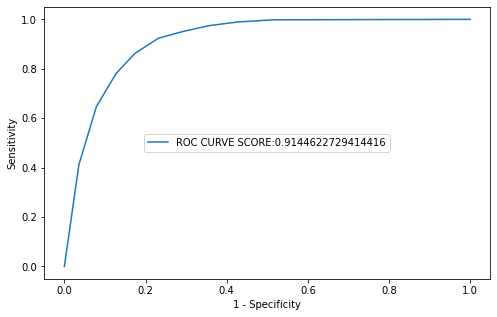

<Figure size 432x288 with 0 Axes>

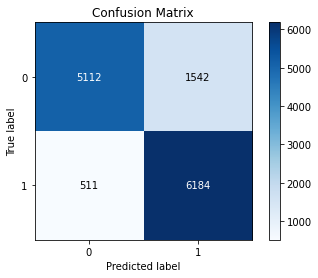

In [160]:
model_predict(KNeighborsClassifier(n_neighbors=9))

#### DECISION TREE:


------------ DecisionTreeClassifier() --------------
 Accuracy Score         :  0.8424601093714885
ROC AUC Score           :  0.8424201988258647
F1 Score                : 0.8448771852179685
Cross Validation Score  :  0.8339097158605945
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6654
           1       0.83      0.86      0.84      6695

    accuracy                           0.84     13349
   macro avg       0.84      0.84      0.84     13349
weighted avg       0.84      0.84      0.84     13349



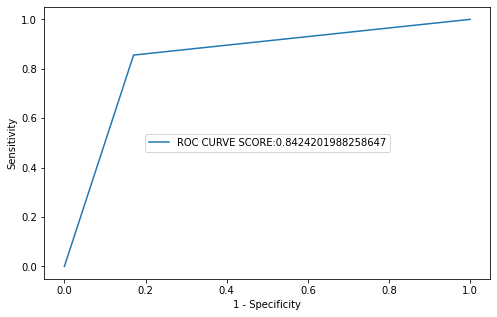

<Figure size 432x288 with 0 Axes>

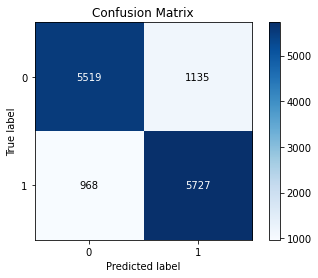

In [161]:
model_predict(DecisionTreeClassifier())

------------ RandomForestClassifier() --------------
 Accuracy Score         :  0.8905535995205633
ROC AUC Score           :  0.959266893879551
F1 Score                : 0.893147078183281
Cross Validation Score  :  0.8898406693575234
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      6654
           1       0.88      0.91      0.89      6695

    accuracy                           0.89     13349
   macro avg       0.89      0.89      0.89     13349
weighted avg       0.89      0.89      0.89     13349



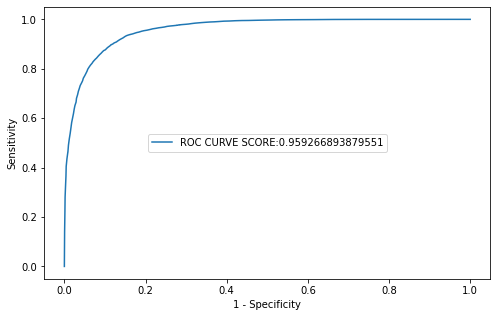

<Figure size 432x288 with 0 Axes>

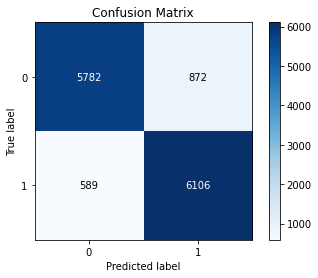

In [162]:
model_predict(RandomForestClassifier())

[12:00:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) --------------
 Accuracy Score         :  0.9059105550977601
ROC AUC Score           :  0.97254

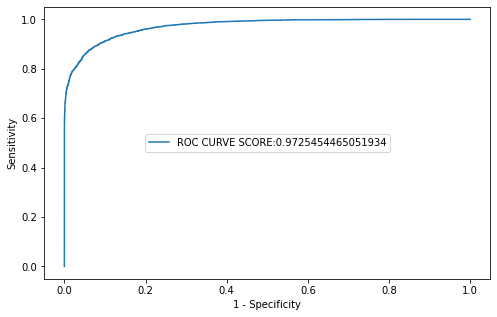

<Figure size 432x288 with 0 Axes>

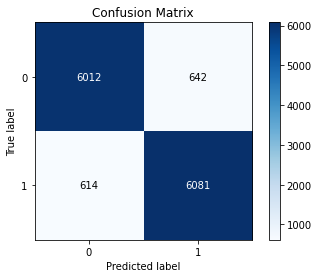

In [163]:
model_predict(XGBClassifier())

------------ LGBMClassifier() --------------
 Accuracy Score         :  0.8999175968237321
ROC AUC Score           :  0.9693526587745993
F1 Score                : 0.901037037037037
Cross Validation Score  :  0.8775315176050261
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6654
           1       0.89      0.91      0.90      6695

    accuracy                           0.90     13349
   macro avg       0.90      0.90      0.90     13349
weighted avg       0.90      0.90      0.90     13349



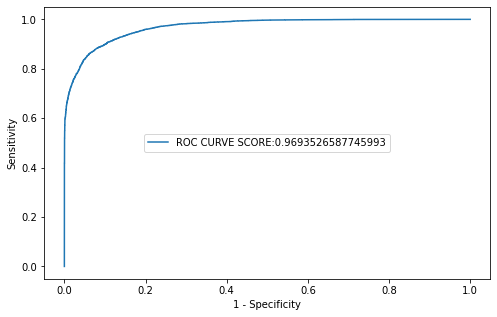

<Figure size 432x288 with 0 Axes>

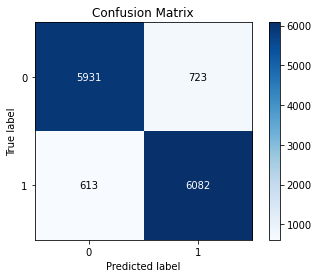

In [164]:
model_predict(LGBMClassifier())

In [165]:
error = []
for i in range(0,6):
    error.append(np.abs(f1_scores[i] - cv_scores[i]))
    

In [166]:
table_dict = {
    'ROC AUC SCORE: ':auc_roc_scores,
    'ACCURACY SCORE': acc_scores,
    'CV SCORE': cv_scores,
    'F1 SCORE': f1_scores,
    'Bias/ Error': error
}

In [167]:
table_model = pd.DataFrame(table_dict,index=['LReg','KNN','DTC','RF','XGBC','LightGBMC'])

In [168]:
table_model

,ROC AUC SCORE:,ACCURACY SCORE,CV SCORE,F1 SCORE,Bias/ Error
LReg,0.804629,0.731366,0.739836,0.740371,0.000535
KNN,0.914462,0.846206,0.855062,0.857638,0.002576
DTC,0.842420,0.842460,0.834474,0.844877,0.010403
RF,0.959267,0.890554,0.890228,0.893147,0.002919
XGBC,0.972545,0.905911,0.874303,0.906394,0.032092
LightGBMC,0.969353,0.899918,0.877532,0.901037,0.023506


#### OBSERVATION:
    - Evaluation MEtrics choosen is F1 SCORE as it it checks recall score and Precision score for both the classes. as other evaluatioin metrics might  give biases score for majority class.
    
    - HIghest F1 Score/ ROC AUC is for XGBC and LightGB.
    
    - Error/ Bias term is least for KNN. But AS Error terms for ther models are not that huge, are are considerablely close to each other, we can use the model highest f1 score to hyper TUNE.
    
    - MODEL CHOOSEN: XGBC
   

### HYPER PARAMETER TUNING

In [169]:
params = {
    'n_estimators': [50,100,200],
    'max_depth': [5,10,15,7],
    'learning_rate': [0.1,.5,.2,0.01],
    'gamma': [.1,.5,1,2],
    'subsample': [1,.8,.75,.6],
    'min_child_weight': [1,3,5,2]
    
    
}

In [170]:
boost = XGBClassifier()
grid = RandomizedSearchCV(boost,params,cv=5,n_iter=50,scoring='f1',verbose=2)

In [171]:
grid.fit(x_over,y_over)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[12:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=2, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=50, subsample=0.6; total time=   3.9s
[12:02:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=2, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=50, subsample=0.6; total time=   4.0s
[12:02:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

KeyboardInterrupt: 

In [226]:
grid.best_params_,grid.best_score_

({'subsample': 1,
  'n_estimators': 200,
  'min_child_weight': 1,
  'max_depth': 15,
  'learning_rate': 0.1,
  'gamma': 1},
 0.879835944390635)

In [172]:
model_predict(XGBClassifier(subsample=1,n_estimators=200,
                            min_child_weight=1,max_depth=15,
                            learning_rate=0.1,gamma=1
                             ))

[12:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) --------------
 Accuracy Score         :  0.9041875795939771
ROC AUC Score           :  0.972308121053

KeyboardInterrupt: 

In [ ]:
params_lgbr = {
    'num_leaves': [70,80,50,40,20],
    'max_depth': [5,7,10,12,15],
   
    'bagging_freq': [5,10,15,7,12], 
    "bagging_fraction": [0.75,.6,.5,.8,.85,.7],
    'learning_rate': [.01,.02,.1,.5]
}
LightGBR = LGBMClassifier()
grid_l= RandomizedSearchCV(LightGBR,params_lgbr,cv=5,scoring='f1',n_iter=30,verbose=2,n_jobs=5) 

In [230]:
grid_l.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=30, n_jobs=5,
                   param_distributions={'bagging_fraction': [0.75, 0.6, 0.5,
                                                             0.8, 0.85, 0.7],
                                        'bagging_freq': [5, 10, 15, 7, 12],
                                        'learning_rate': [0.01, 0.02, 0.1, 0.5],
                                        'max_depth': [5, 7, 10, 12, 15],
                                        'num_leaves': [70, 80, 50, 40, 20]},
                   scoring='f1', verbose=2)

In [232]:
grid_l.best_score_,grid_l.best_estimator_

(0.894234273476626,
 LGBMClassifier(bagging_fraction=0.75, bagging_freq=15, max_depth=12,
                num_leaves=70))

[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
------------ LGBMClassifier(bagging_fraction=0.75, bagging_freq=15, max_depth=24,
               num_leaves=100) --------------
 Accuracy Score         :  0.9064349389467375
ROC AUC Score           :  0.9734917066848221
F1 Score                : 0.9067980001492426
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] bagging_fraction is set=0.7

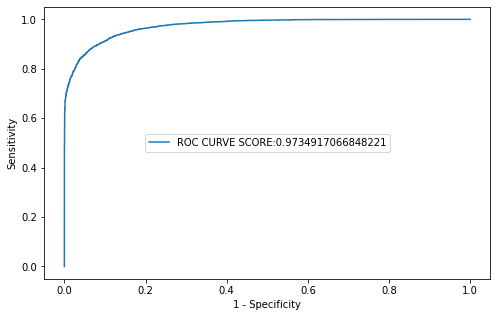

<Figure size 432x288 with 0 Axes>

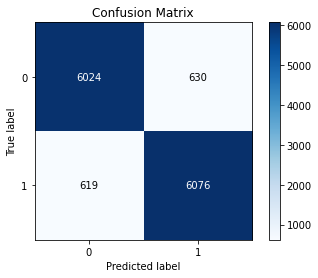

In [177]:
model_predict( LGBMClassifier(bagging_fraction=0.75, bagging_freq=15, max_depth=24,
                num_leaves=100))

#### OBSERVATION: 
    - BOTH LightGB, XGB have have same f1-scores, and other precision, precall scores.
    - Light GB More TP,TN than XGB.
    - FINAL MODEL : LightGB

## EVALUATING LightGBClassifier

In [178]:
    model = LGBMClassifier(bagging_fraction=0.75, bagging_freq=15, max_depth=24,
                num_leaves=100)
    
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,pred_proba)
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    print('ROC AUC Score           : ', roc_auc_score(y_test,pred_proba))
    print('F1 Score                :',f1_score(y_test,predictions))
    print('Precision Score         :',precision_score(y_test,predictions))
    print('Recall Score         :',recall_score(y_test,predictions))
   

[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
------------ LGBMClassifier(bagging_fraction=0.75, bagging_freq=15, max_depth=24,
               num_leaves=100) --------------
 Accuracy Score         :  0.9064349389467375
ROC AUC Score           :  0.9734917066848221
F1 Score                : 0.9067980001492426
Precision Score         : 0.906054279749478
Recall Score         : 0.9075429424943988


In [179]:
 print('Cross Validation Score  : ',np.mean(cross_val_score(model,x_over,y_over,cv=10,scoring='f1')))
    
    
   

[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Cu

In [180]:
print(confusion_matrix(y_test,predictions
                      ))
print(classification_report(y_test,predictions))

[[6024  630]
 [ 619 6076]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6654
           1       0.91      0.91      0.91      6695

    accuracy                           0.91     13349
   macro avg       0.91      0.91      0.91     13349
weighted avg       0.91      0.91      0.91     13349



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

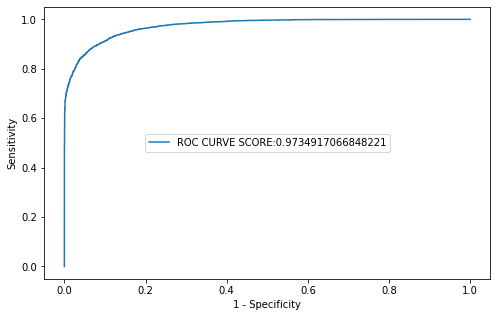

<Figure size 432x288 with 0 Axes>

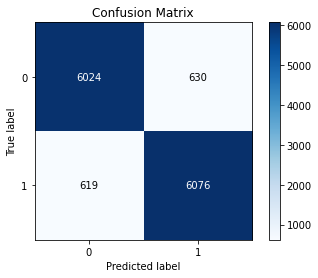

In [181]:
 
    plt.figure(figsize=(8,5))
    plt.plot(fpr,tpr)
    plt.ylabel('Sensitivity')
    plt.xlabel('1 - Specificity')
    leg = 'ROC CURVE SCORE:'+ str(roc_auc_score(y_test,pred_proba))
    plt.legend( [leg],loc= 10)
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    

### SAVING THE MODEL

In [182]:
import joblib as jb

In [183]:
jb.dump(model,'census_lgbc.pk1')

['census_lgbc.pk1']

In [184]:
jb.load('census_lgbc.pk1')

LGBMClassifier(bagging_fraction=0.75, bagging_freq=15, max_depth=24,
               num_leaves=100)

### CONCLUSION:
         
         WE have build a model with LightGBM Classifer MODel with an AUC ROC ACCuracy of .972 , PRecision, Recall and F1 Score with .90 and total accuracy score of .90. 
         - WE doont have a model biased towards 1 class.
         - WE have a model that is able to predict both the classes of target variable with same precision, recall.